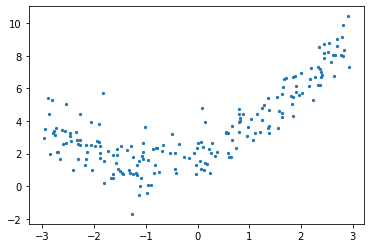

In [3]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
data = genfromtxt('mydata.csv', delimiter=',')
X,y=np.split(data,2,axis=1)
X=X.flatten()
y=y.flatten()
plt.scatter(X, y, s = 5)

In [4]:
x_tr, y_tr = np.array(X[:175]), np.array(y[:175])
x_val, y_val = np.array(X[175:]), np.array(y[175:])

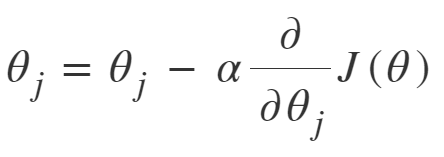

$J(W)= (\hat{y}^i-y^i)^2$ (Mean Squared Error)

${\partial J(W) \over \partial W_j} = (\hat{y}-y)x_j$

In [21]:
errors = []
w1_grad = []
w2_grad = []

num_epoch=5000
learning_rate=0.01

w1 = np.random.uniform(low=-1.0, high=1.0)
w2 = np.random.uniform(low=-1.0, high=1.0)

b = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    rnd=np.random.randint(174)
    y_hat = w1 * x_tr[rnd] + w2 * (x_tr[rnd]**2) + b

    error = ((y_hat - y_tr[rnd])**2)
    if error < 0.00001:
        break
    
    # 미분값 적용 (Gradient)
    w1 = w1 - learning_rate * ((y_hat - y_tr[rnd]) * x_tr[rnd])
    w2 = w2 - learning_rate * ((y_hat - y_tr[rnd]) * (x_tr[rnd]**2))
    
    w1_grad.append(w1)
    w2_grad.append(w2)
    
    b = b - learning_rate * (y_hat - y_tr[rnd])
    
    errors.append(error)
    
    if epoch % 5 == 0:
        print("{0:2} w1 = {1:.5f}, w2 = {2:.5f}, ,b = {3:.5f} error = {4:.5f}".format(epoch, w1, w2, b, error))

print("----" * 15)
print("{0:2} w1 = {1:.1f}, w2 = {2:.1f}, b = {3:.1f} error = {4:.5f}".format(epoch, w1, w2,b, error))

 0 w1 = -0.73795, w2 = 0.51346, ,b = -0.58284 error = 67.56327
 5 w1 = -0.38742, w2 = 0.70177, ,b = -0.49919 error = 32.53205
10 w1 = -0.11035, w2 = 0.77951, ,b = -0.44034 error = 2.70734
15 w1 = 0.07236, w2 = 1.20559, ,b = -0.36623 error = 2.71019
20 w1 = 0.22262, w2 = 0.94667, ,b = -0.33331 error = 0.81624
25 w1 = 0.34396, w2 = 0.90623, ,b = -0.25575 error = 13.67433
30 w1 = 0.43294, w2 = 0.70230, ,b = -0.22196 error = 6.43016
35 w1 = 0.53854, w2 = 0.97220, ,b = -0.08949 error = 10.16267
40 w1 = 0.63531, w2 = 0.80768, ,b = -0.06506 error = 0.56736
45 w1 = 0.74356, w2 = 0.89777, ,b = -0.04424 error = 0.29770
50 w1 = 0.73362, w2 = 0.92539, ,b = 0.03194 error = 0.56293
55 w1 = 0.73328, w2 = 1.07115, ,b = 0.09892 error = 2.21941
60 w1 = 0.73561, w2 = 1.24028, ,b = 0.18289 error = 10.37030
65 w1 = 0.92596, w2 = 0.72206, ,b = 0.15778 error = 0.28556
70 w1 = 0.92962, w2 = 0.72863, ,b = 0.22916 error = 2.84872
75 w1 = 0.87508, w2 = 0.82103, ,b = 0.25947 error = 0.89500
80 w1 = 0.84018, w2 = 

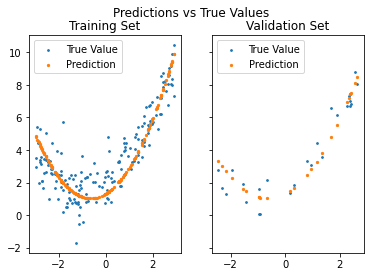

In [22]:
def plot_predictions(x_tr, y_tr, g, x_val, y_val, g_val):
    fig, axs = plt.subplots(1, 2, sharey = True)
    fig.suptitle('Predictions vs True Values')

    axs[0].scatter(x_tr, y_tr, s = 3, label = 'True Value')
    axs[0].scatter(x_tr, g, s = 5, label = 'Prediction')
    axs[0].legend()
    axs[0].set_title('Training Set')

    axs[1].scatter(x_val, y_val, s = 3, label = 'True Value')
    axs[1].scatter(x_val, g_val, s = 5, label = 'Prediction')
    axs[1].legend()
    axs[1].set_title('Validation Set')
    
    plt.show()
g=w1 * x_tr + w2 * (x_tr**2) + b

g_val = w1 * x_val + w2 * (x_val**2) + b

plot_predictions(x_tr, y_tr, g, x_val, y_val, g_val)

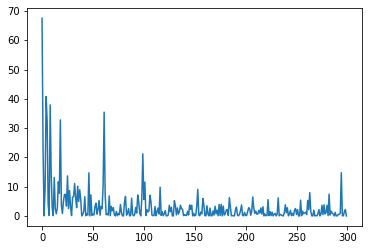

In [23]:
plt.plot(errors)